# **Hometask 4 (optional)**
1.Choose one linear and one non-linear dimension reduction method

2.Run them on your data (It is preferable to use seaborn and plotly to visualize results)

3.Justify the choice of the number of components / dimensions and explain them

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 819.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
import umap
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('/content/data_4ts.csv')

In [4]:
df

A         B        mu     alpha        r2        u0  \
0      0.012660  0.017045  0.132554  0.479163  0.362334  0.357601   
1      0.011682  0.026399  0.096532  0.530182  0.300345  0.430220   
2      0.019584  0.036806  0.141888  0.335989  0.217268  0.508346   
3      0.014703  0.022730  0.335682  0.468362  0.291360  0.408575   
4      0.009784  0.013414  0.034278  0.580282  0.441907  0.391723   
...         ...       ...       ...       ...       ...       ...   
19976  0.011709  0.031562  0.198188  0.466830  0.273674  0.367500   
19977  0.011556  0.018721  0.190097  0.475563  0.357113  0.401115   
19978  0.006300  0.029262  0.285913  0.509193  0.345251  0.437369   
19979  0.016301  0.012663  0.282260  0.411062  0.395635  0.256188   
19980  0.009867  0.019178  0.197135  0.496400  0.364178  0.398739   

       lipinskiHBA  lipinskiHBD  NumRotatableBonds  NumAmideBonds  ...  \
0         0.285714     0.000000           0.166667           0.00  ...   
1         0.142857     0.000000           0.166667           0.00  ...   
2         0.285714     0.142857           0.000000           0.00  ...   
3         0.428571     0.285714           0.000000           0.00  ...   
4         0.285714     0.142857           0.166667           0.00  ...   
...            ...          ...                ...            ...  ...   
19976     0.428571     0.142857           0.000000           0.00  ...   
19977     0.285714     0.000000           0.166667           0.00  ...   
19978     0.285714     0.000000           0.000000           0.00  ...   
19979     0.571429     0.142857           0.166667           0.25  ...   
19980     0.285714     0.000000           0.166667           0.00  ...   

       n5FRing  n6FRing  n7FRing  n8FRing  n9FaRing      GGI4      GGI5  \
0          0.0      0.0      1.0      0.0       0.0  0.382308  0.500000   
1          0.0      0.0      1.0      0.0       0.0  0.346154  0.000000   
2          0.0      0.0      0.0      0.0       0.0  0.000000  0.000000   
3          0.0      0.0      1.0      0.0       0.0  0.363077  0.219298   
4          0.0      0.0      0.0      0.0       0.0  0.332308  0.000000   
...        ...      ...      ...      ...       ...       ...       ...   
19976      0.0      0.0      0.0      0.0       0.0  0.134615  0.000000   
19977      0.0      0.0      0.0      0.0       0.0  0.346154  0.280702   
19978      0.0      0.0      0.0      0.0       0.0  0.000000  0.000000   
19979      0.0      0.0      0.0      0.0       0.0  0.584615  0.414230   
19980      0.5      0.0      0.0      0.0       0.0  0.591538  0.000000   

       TopoShapeIndex                  smiles     gap  
0            0.666667          O=CC1CCC2OC2C1  0.2258  
1            1.000000        COC12CC=C3CC1C23  0.1826  
2            1.000000            OC1CCC(=O)C1  0.2209  
3            0.666667        N#CC12NC3CNC1C23  0.2368  
4            0.666667        CC(=NO)CC(C)(C)C  0.2507  
...               ...                     ...     ...  
19976        1.000000             c1nc(no1)CO  0.2503  
19977        0.666667        C1OC2CC=CC3C1C23  0.2493  
19978        1.000000  C[NH+]=C1NCC1C([O-])=O  0.2342  
19979        1.000000         c1c(coc1N2CC2)O  0.2179  
19980        0.666667           c1c(ocn1)CCCO  0.2424  

[19981 rows x 144 columns]

1. The chosen methods
Linear - PCA, LDA, ICA - just want to see all (not one of them is divided beautifully into 2 components, everywhere got frog shapes)

2. Nonlinear - UMAP choice, just looks most representative
AND t-SNE - because it works well with a large number of dimensions, and we have about 20K and 145 columns

In [5]:
smiles = df['smiles']
gap = df['gap']

In [6]:
df = df.drop(columns=['smiles'])

In [7]:
#Divide data into X - numeric descriptors and Y - target
X = df.drop(['gap'],axis=1)
Y = df['gap']

X_norm = X

In [8]:
#Binarize Y
bins = np.linspace(round(Y.min(),0)-1, round(Y.max(),0)+1, num = 6)
Y_labels = np.digitize(Y, bins)

2. Visualization of the main components and reduction of dimension

1.1 Linear methods

It turned out that LDA removed 2 components of all

In [ ]:
#Perform LDA
lda = LDA()
X_lda = lda.fit_transform(X_norm,Y_labels)

#Print number of components
X_lda.shape

(19981, 2)

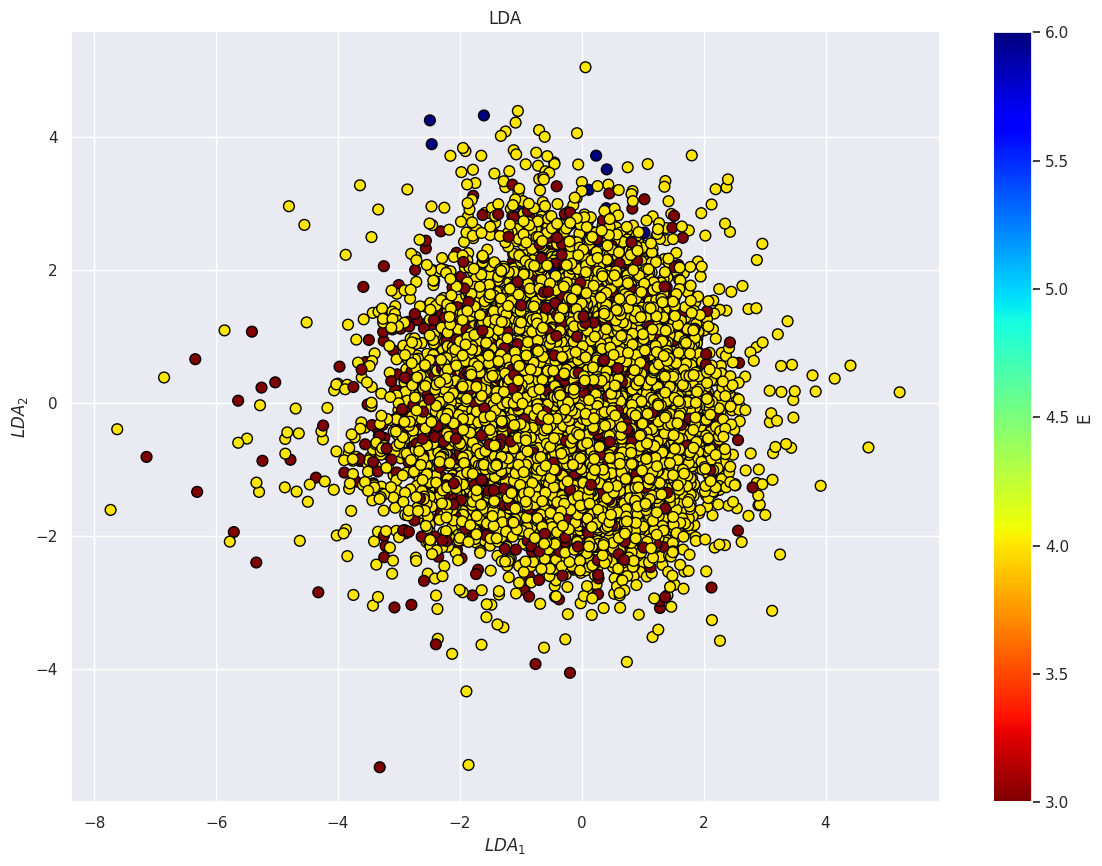

In [ ]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], c = Y_labels, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$LDA_1$')
plt.ylabel(r'$LDA_2$')
plt.title('LDA')
sns.despine()
plt.show()

As you can see, LDA could not separate my classes. And the whole dispersion of data is explained by 2 components

In [ ]:
#Print explained variance
lda.explained_variance_ratio_.sum()

1.0

In [ ]:
#Perform ICA with 2 components
ica = FastICA(n_components = 2)
X_ica = ica.fit_transform(X_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



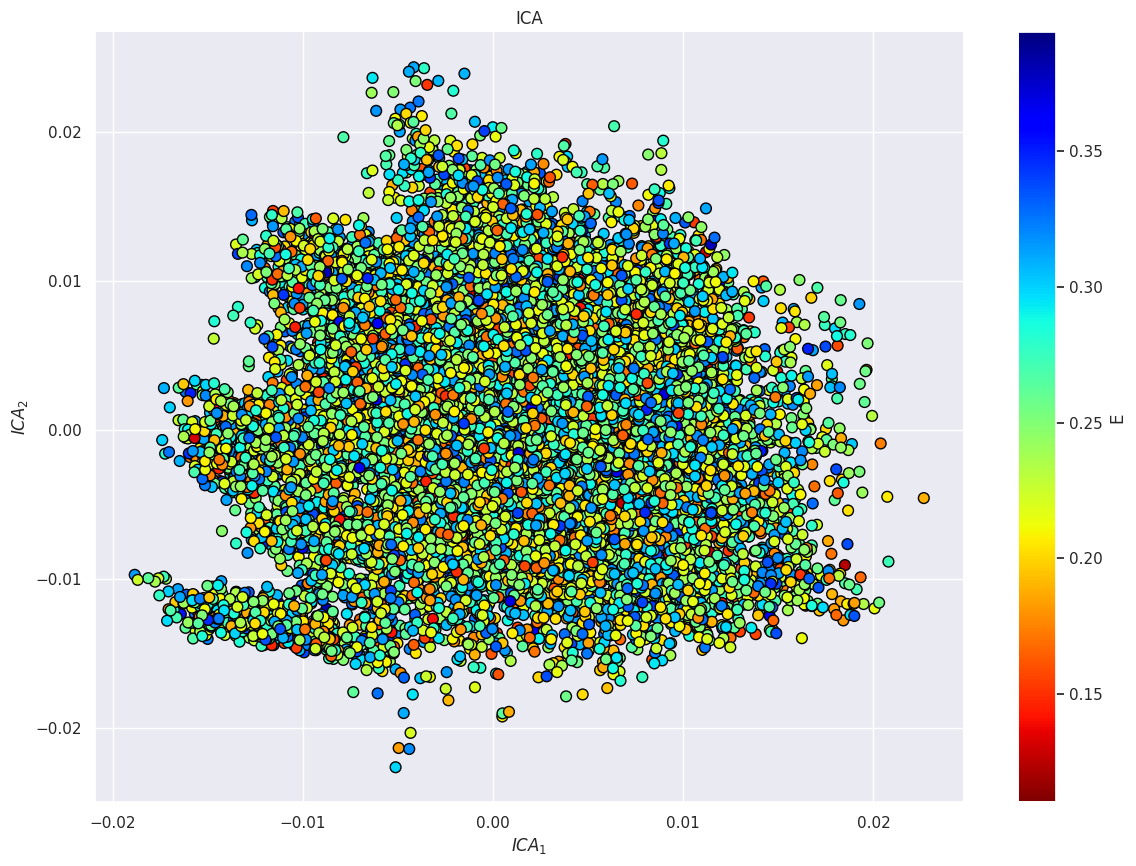

In [ ]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_ica[:, 0], X_ica[:, 1], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$ICA_1$')
plt.ylabel(r'$ICA_2$')
plt.title('ICA')
sns.despine()
plt.show()

Somehow here to divide into components nothing at all, probably because our data is not completely independent, as some point of correlation is...

In [9]:
def PCA_implementation(X , num_components):

    #Subtract the mean of each variable
    X_meaned = X - np.mean(X , axis = 0)

    #Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

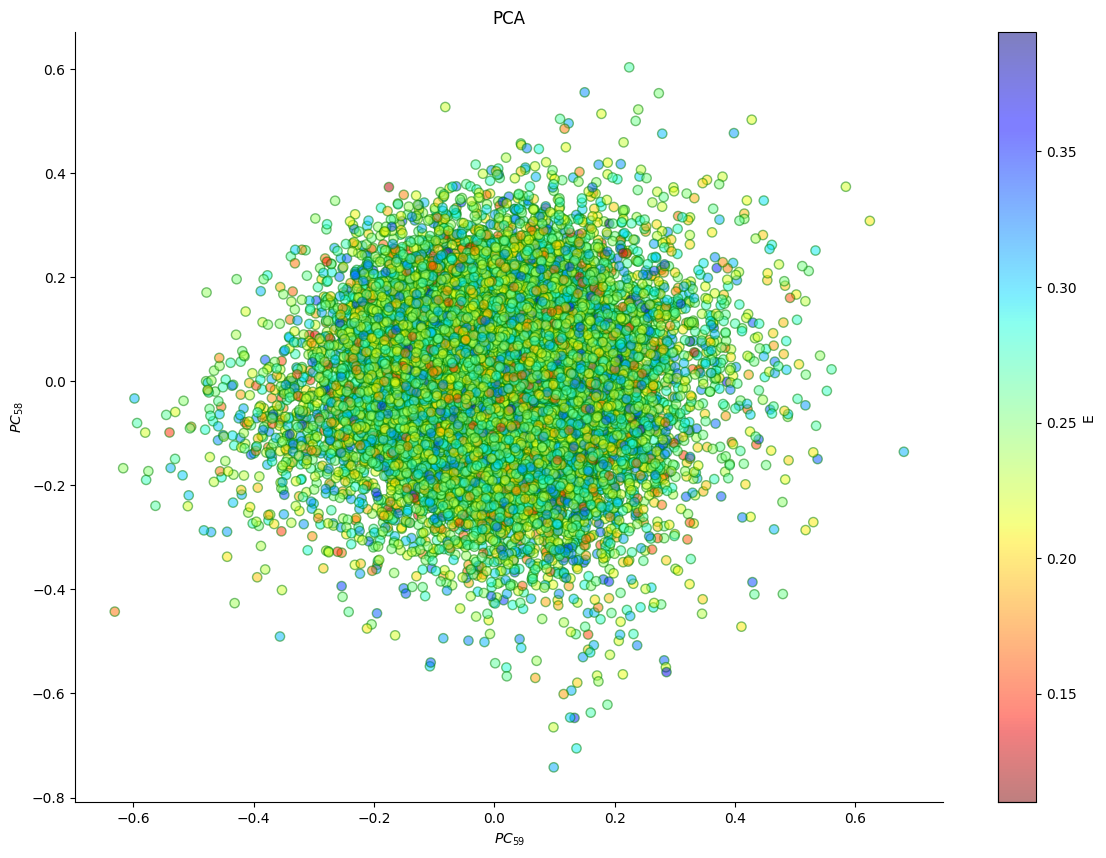

In [18]:
# Perform PCA with 59 principal components
X_reduced = PCA_implementation(X_norm, 59)

# Plot results colored by target values
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_reduced[:,29], X_reduced[:,28], c=Y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$PC_{59}$')
plt.ylabel(r'$PC_{58}$')
plt.title('PCA')
sns.despine()
plt.show()

Again, the data is not shown to be divided into classes. Apparently PCA also could not divide into classes, if you take only 2 components and get a frog-like graph, that is to describe our data need more component. So I looked at how much component describes 95% of the data and it turned out to be 59, but the graphs for 59 components were not better as you can see above

3. Please specify the number of components/sizes and explain them.

In [ ]:
#Perform PCA with specified variance of 95%
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_norm)

#Print results
print('Original Dimensions: ',X_norm.shape)
print('Reduced Dimensions: ',X_reduced.shape)
print("Explained variance: ", pca.explained_variance_ratio_.sum())

Original Dimensions:  (19981, 142)
Reduced Dimensions:  (19981, 59)
Explained variance:  0.9505268806637951


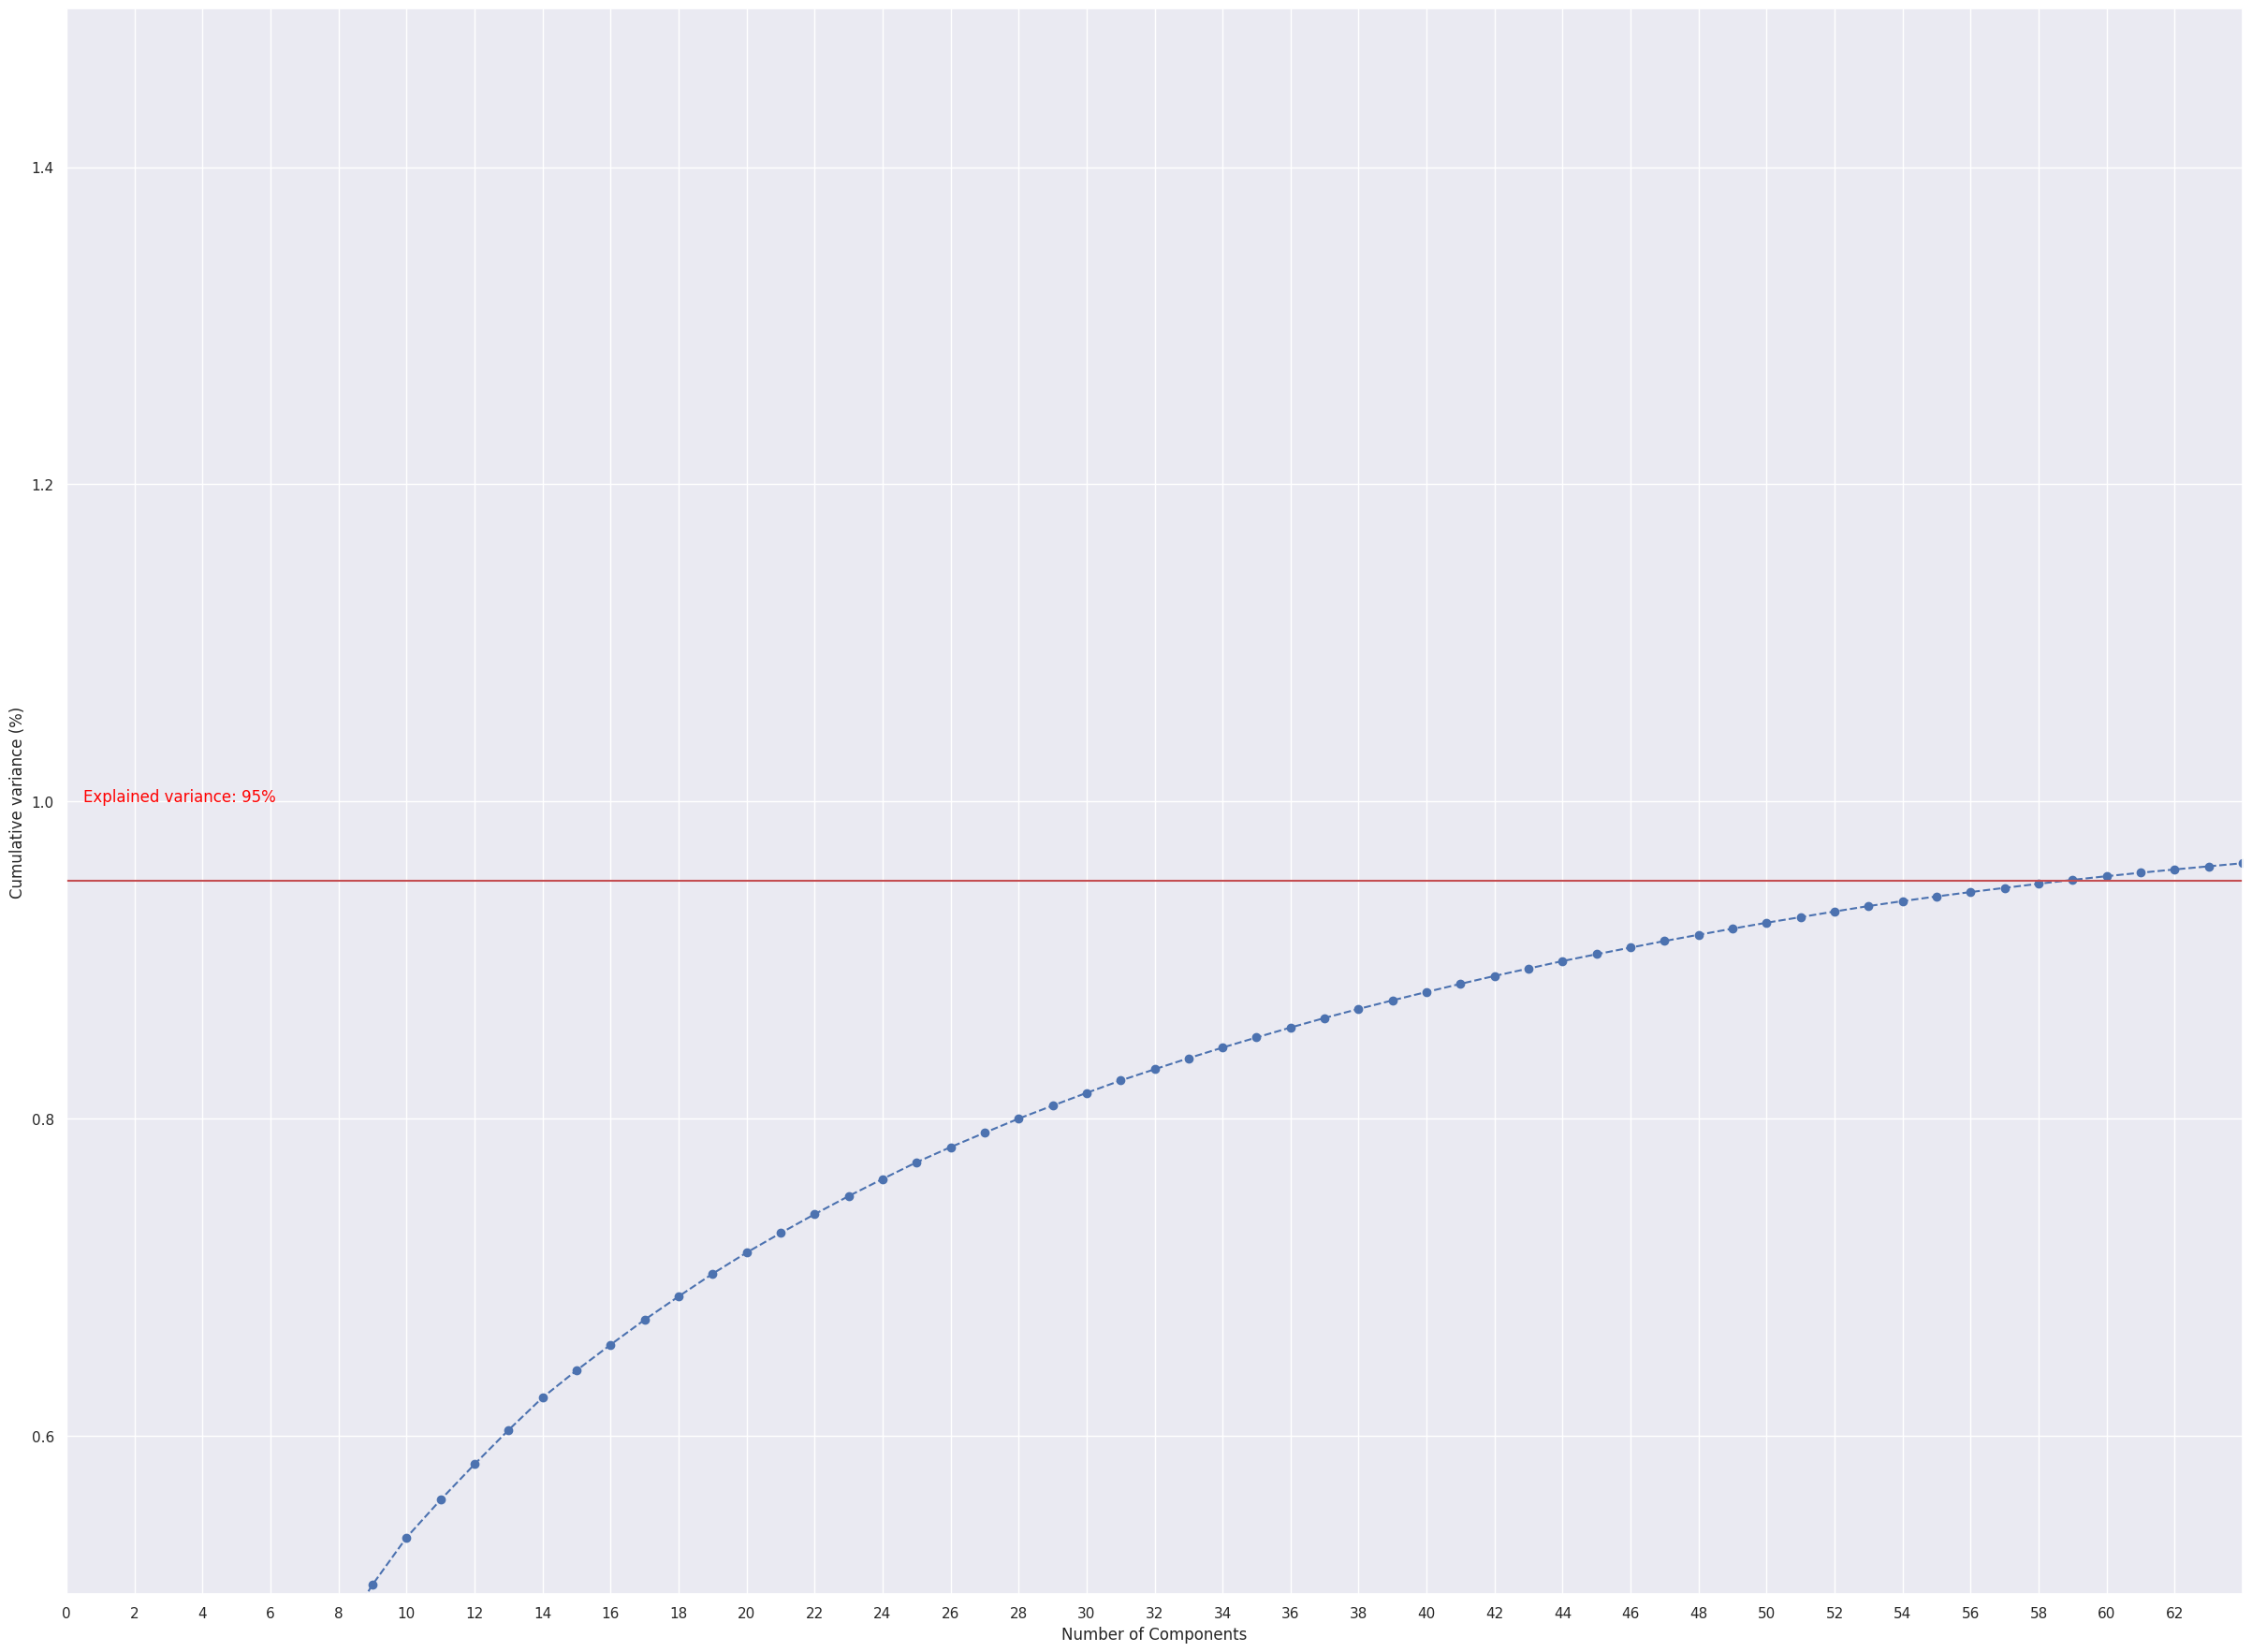

In [ ]:
#Perform PCA
pca = PCA()
X_reduced = pca.fit_transform(X_norm)

#Calculate cumulative variance
y = np.cumsum(pca.explained_variance_ratio_)

#Calculate principal components
xi = np.arange(1, y.shape[0]+1, step=1)

#Plot results
plt.ylim(0.5,1.5)
plt.xlim(0.0,64)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 64, step=2))
plt.ylabel('Cumulative variance (%)')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 1, 'Explained variance: 95%', color = 'red', fontsize=12)
ax.grid(axis='x')
plt.show()

As you can see, the red line is plotting the number of coponents 59, which indicates that to preserve 95% of explained dispersion you need to save 59 components from the original data set

In [ ]:
#Perform PCA with specified variance of 95%
pca = PCA(n_components = 59)
X_reduced = pca.fit_transform(X_norm)

Create dataset with components and source columns to see correlation

In [ ]:
#Combine the original data and first three PCs
df_pc = pd.DataFrame(data = X_reduced, columns = [f'PC{i}' for i in range(1,60)])
df_col = pd.concat([df_pc[['PC1','PC2','PC3']],pd.DataFrame(X_norm, columns=X.columns)], axis=1)
df_col

PC1       PC2       PC3         A         B        mu     alpha  \
0     -0.339214  0.442302  0.159721  0.012660  0.017045  0.132554  0.479163   
1     -0.643303  0.098820  0.165701  0.011682  0.026399  0.096532  0.530182   
2      0.126477 -0.011759  0.013490  0.019584  0.036806  0.141888  0.335989   
3     -0.078209 -0.031696  0.678240  0.014703  0.022730  0.335682  0.468362   
4     -0.135424 -0.594030 -0.330410  0.009784  0.013414  0.034278  0.580282   
...         ...       ...       ...       ...       ...       ...       ...   
19976 -0.033615  0.437328  0.373794  0.011709  0.031562  0.198188  0.466830   
19977 -0.049046 -0.590533 -0.218991  0.011556  0.018721  0.190097  0.475563   
19978  0.014199 -0.728073 -0.453850  0.006300  0.029262  0.285913  0.509193   
19979  0.889089  0.285766 -0.114927  0.016301  0.012663  0.282260  0.411062   
19980 -0.247872 -0.023133 -0.245990  0.009867  0.019178  0.197135  0.496400   

             r2        u0  lipinskiHBA  ...  n7aRing  n9aRing  n5FRing  \
0      0.362334  0.357601     0.285714  ...      0.0      0.0      0.0   
1      0.300345  0.430220     0.142857  ...      0.0      0.0      0.0   
2      0.217268  0.508346     0.285714  ...      0.0      0.0      0.0   
3      0.291360  0.408575     0.428571  ...      0.0      0.0      0.0   
4      0.441907  0.391723     0.285714  ...      0.0      0.0      0.0   
...         ...       ...          ...  ...      ...      ...      ...   
19976  0.273674  0.367500     0.428571  ...      0.0      0.0      0.0   
19977  0.357113  0.401115     0.285714  ...      0.0      0.0      0.0   
19978  0.345251  0.437369     0.285714  ...      0.0      0.0      0.0   
19979  0.395635  0.256188     0.571429  ...      0.0      0.0      0.0   
19980  0.364178  0.398739     0.285714  ...      0.0      0.0      0.5   

       n6FRing  n7FRing  n8FRing  n9FaRing      GGI4      GGI5  TopoShapeIndex  
0          0.0      1.0      0.0       0.0  0.382308  0.500000        0.666667  
1          0.0      1.0      0.0       0.0  0.346154  0.000000        1.000000  
2          0.0      0.0      0.0       0.0  0.000000  0.000000        1.000000  
3          0.0      1.0      0.0       0.0  0.363077  0.219298        0.666667  
4          0.0      0.0      0.0       0.0  0.332308  0.000000        0.666667  
...        ...      ...      ...       ...       ...       ...             ...  
19976      0.0      0.0      0.0       0.0  0.134615  0.000000        1.000000  
19977      0.0      0.0      0.0       0.0  0.346154  0.280702        0.666667  
19978      0.0      0.0      0.0       0.0  0.000000  0.000000        1.000000  
19979      0.0      0.0      0.0       0.0  0.584615  0.414230        1.000000  
19980      0.0      0.0      0.0       0.0  0.591538  0.000000        0.666667  

[19981 rows x 145 columns]

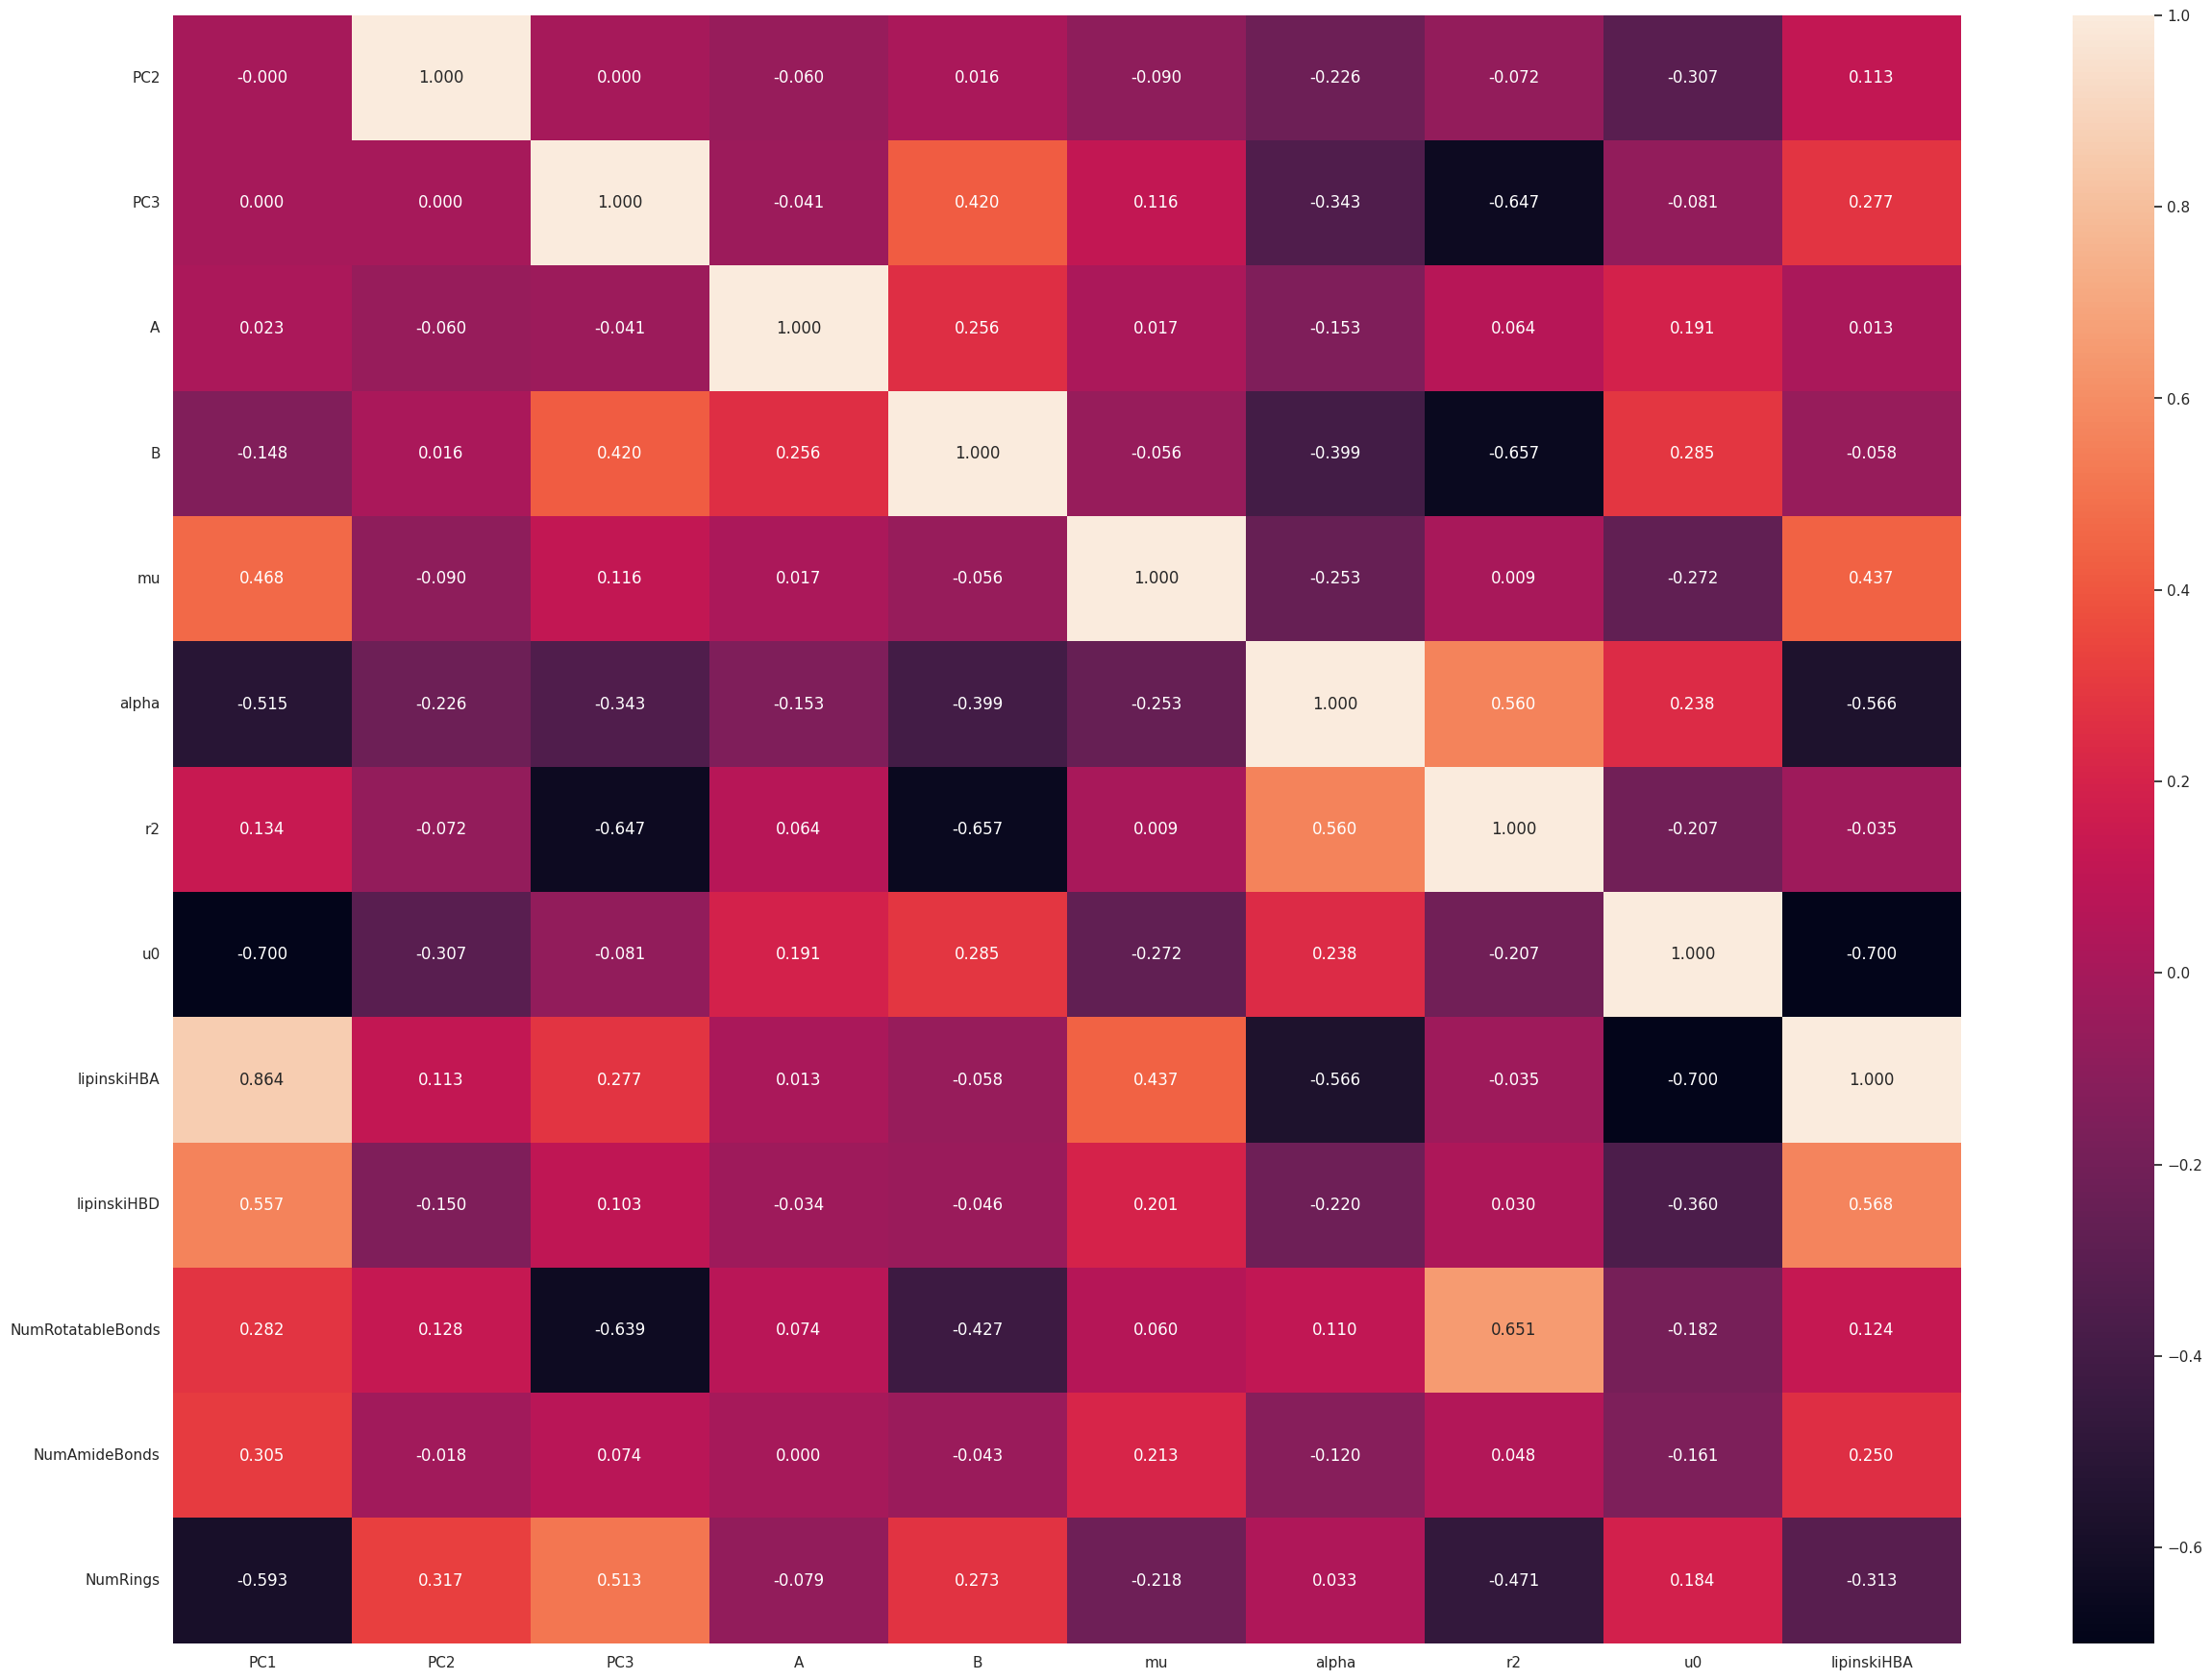

In [ ]:
#difference the original data and PCAs
corMatrix = pd.DataFrame.corr(df_col)

#Select only the first 10 components and source data
corMatrix_subset = corMatrix.iloc[1:14, :10]

#results
sns.set(rc={'figure.figsize':(30,22)})
sns.heatmap(corMatrix_subset, annot=True, fmt='.3f')
plt.show()

As you can see, the components are not correlated.

 PC1 - has a high correlation with lipinskiHBA (0.86) and a medium correlation with lipinskiHBD (0.557) of this characteristic to hydrogen bonds and hydrogen acceptors, but also this component has a connection with the energy characteristics of molecules and with the number of atoms in the formula since a negative correlation value with u0 (-0.7) and NumRings(-0.59) is possible to be.

 PC2 - correlates with NumRings, but not strongly (0.317), so to understand its meaning you will have to look at the correlation with the exact features that unfortunately did not fit.

 PC3 - expresses a combination of strut-course, geometric and electronic combinations of molecules as it correlates with B(Rotational constant) = 0.42, NumRings  = 0.513, r2 (Electronic spatial extent) = - 0.647,  NumRotatableBonds correlation -0.639

1.2 Non-linear methods

In [ ]:
#Perform UMAP
X_umap =  umap.UMAP(n_components=5,min_dist=0.1,metric='manhattan').fit_transform(X_norm)

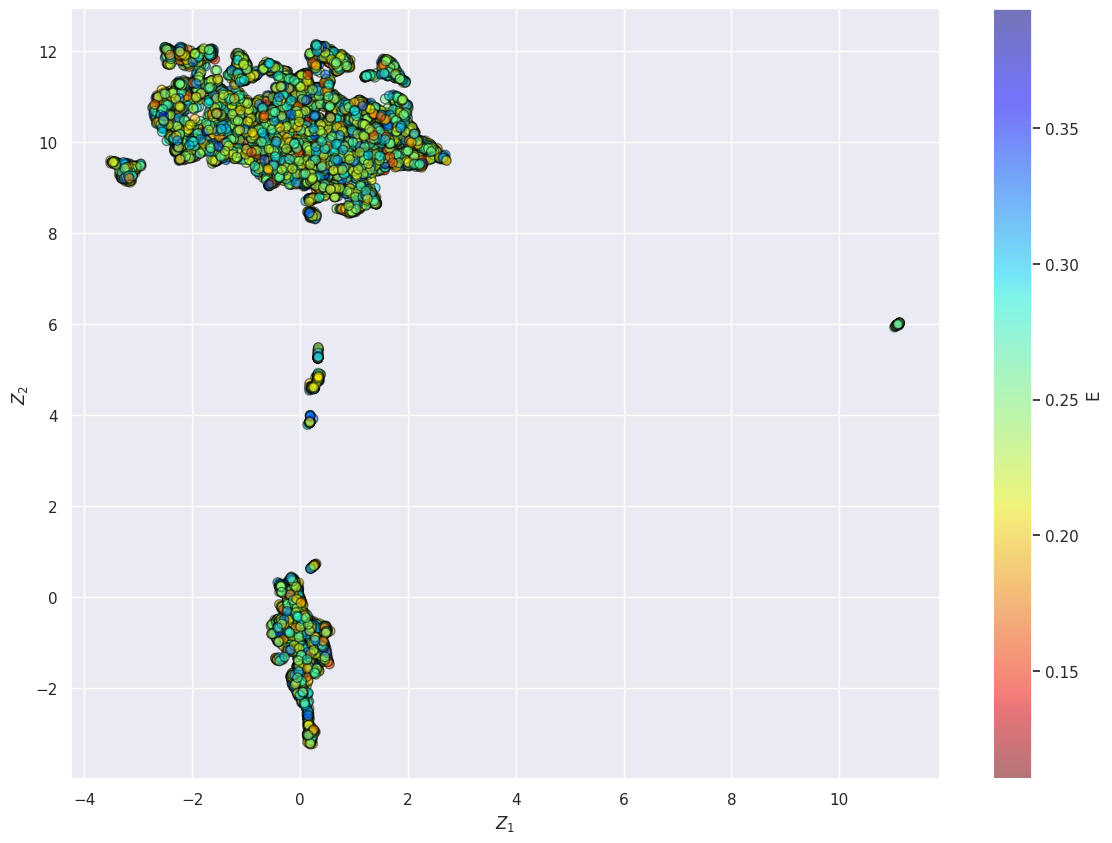

In [ ]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_umap[:,0], X_umap[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

One large cluster, several small clusters around it and a medium cluster at the bottom

3D version of UMAP

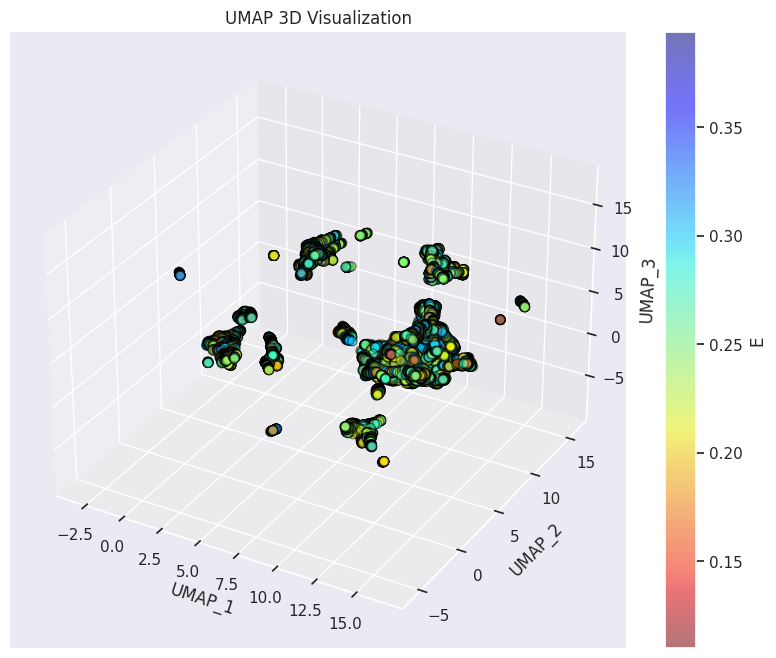

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create UMAP object
umap_model = umap.UMAP(n_components=3)

# Converting data into three-dimensional space
X_umap_3d = umap_model.fit_transform(X)

# Three-dimensional graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label="E")
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3')
plt.title('UMAP 3D Visualization')
plt.show()

The Scroll graph for rotating the same division but from another angle, you can see that there are much more divisions than 2 or 3

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a 3D visualization with Plotly
trace = go.Scatter3d(
    x=X_umap[:, 0],
    y=X_umap[:, 1],
    z=X_umap[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=Y,
        colorscale='Jet',
        opacity=0.8
    )
)

layout = go.Layout(
    title='UMAP 3D Visualization',
    scene=dict(
        xaxis=dict(title='UMAP_1'),
        yaxis=dict(title='UMAP_2'),
        zaxis=dict(title='UMAP_3')
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

The graph above can be rotated

In [ ]:
#Import required libraries
from sklearn.manifold import TSNE

In [ ]:
#Perform t-SNE
tsne = TSNE(n_components=2, perplexity=50)
X_tsne = tsne.fit_transform(X_norm)

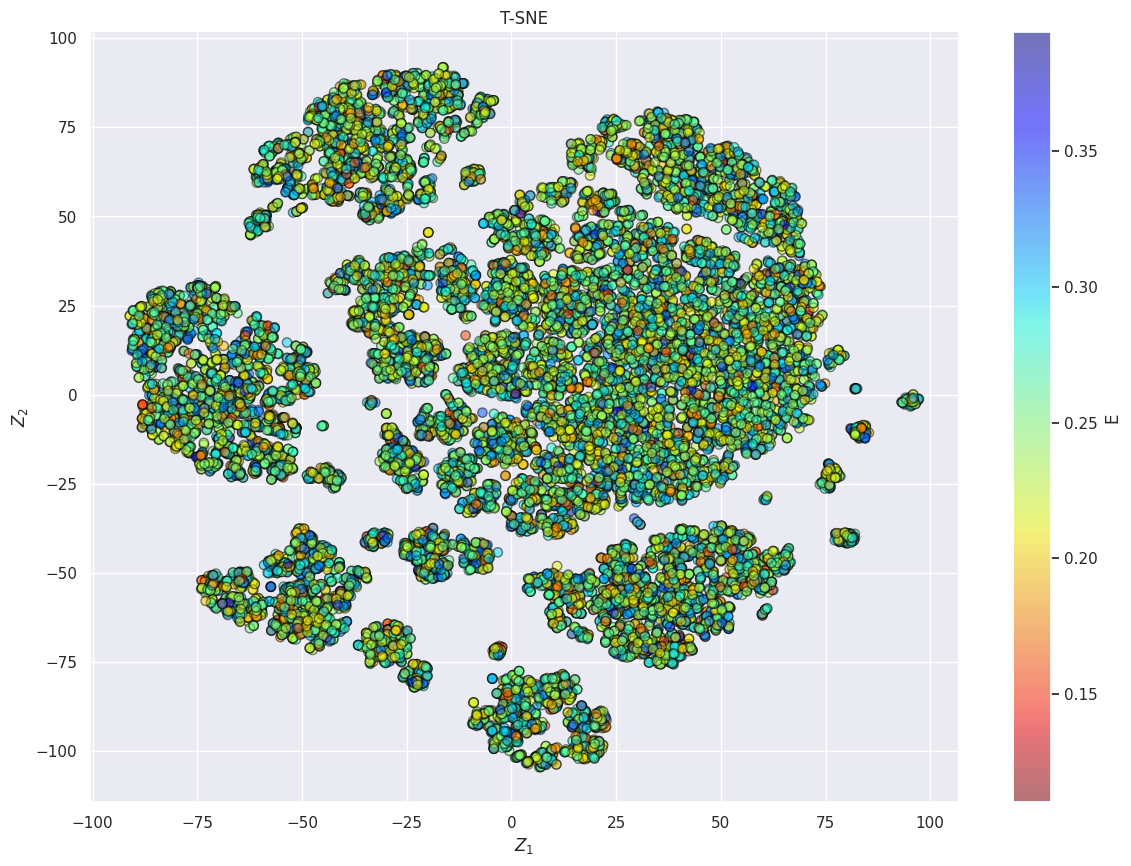

In [ ]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.title('T-SNE')
sns.despine()
plt.show()

The T-SNE graph is the most clearly expressed in clusters and also seems to show that emissions into the data are still coming. You can see that there are many classes

In [ ]:
print('New Shape of X: ', X_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

New Shape of X:  (19981, 2)
Kullback-Leibler divergence after optimization:  1.7388169765472412
No. of iterations:  999


We ended up with 59 components and 19981 lines

In [ ]:
df = pd.DataFrame(data=X_reduced, columns=[f'PC{i}' for i in range(1, 60)])
df['smiles'] = smiles #Return the symbol and target variable to dataset
df['gap'] = gap

In [ ]:
df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -0.339214  0.442302  0.159721 -0.461903 -0.236782  0.702281  0.176595   
1     -0.643303  0.098820  0.165701 -0.437282  0.104974  0.426370  0.457961   
2      0.126477 -0.011759  0.013490 -0.156802 -0.393077  0.036280  0.045197   
3     -0.078209 -0.031696  0.678240  0.245904  0.196744  0.980741 -0.133933   
4     -0.135424 -0.594030 -0.330410 -0.079832  0.133053 -0.016324  0.335906   
...         ...       ...       ...       ...       ...       ...       ...   
19976 -0.033615  0.437328  0.373794  0.133691  0.419226 -0.151528 -0.095548   
19977 -0.049046 -0.590533 -0.218991 -0.091756  0.087148 -0.033772 -0.129681   
19978  0.014199 -0.728073 -0.453850 -0.100943 -0.091309  0.015275 -0.036137   
19979  0.889089  0.285766 -0.114927 -0.063618  0.015302 -0.109214  0.455168   
19980 -0.247872 -0.023133 -0.245990 -0.126018 -0.060975 -0.025004 -0.084973   

            PC8       PC9      PC10  ...      PC52      PC53      PC54  \
0      0.378853 -0.370039  0.382089  ... -0.080061  0.067852 -0.039111   
1     -0.110241 -0.371135 -0.127971  ... -0.044334  0.051943 -0.048330   
2      0.235364  0.210192 -0.173686  ... -0.024181 -0.006624  0.005069   
3     -0.033095 -0.289892 -0.252373  ...  0.106457  0.105640 -0.011042   
4     -0.153286  0.355254 -0.012943  ... -0.088894 -0.042282  0.083902   
...         ...       ...       ...  ...       ...       ...       ...   
19976  0.001703 -0.008845 -0.100168  ...  0.071868 -0.029205  0.033890   
19977 -0.096177 -0.394211 -0.224154  ...  0.110349  0.148339 -0.173841   
19978 -0.476937 -0.089477 -0.592685  ... -0.026064 -0.007584  0.105254   
19979  0.358017 -0.187704  0.012368  ... -0.200711 -0.028286  0.086818   
19980 -0.244461 -0.197616  0.018306  ...  0.012710 -0.083240  0.038239   

           PC55      PC56      PC57      PC58      PC59  \
0      0.154440  0.079698 -0.043792 -0.117808 -0.022823   
1      0.059093  0.093159  0.036363  0.025190  0.091761   
2     -0.043225 -0.001808  0.049079 -0.079340  0.044904   
3     -0.006389 -0.051015 -0.096002  0.141883  0.029436   
4     -0.052619  0.028385 -0.080537 -0.009442 -0.135750   
...         ...       ...       ...       ...       ...   
19976 -0.022481 -0.040726 -0.022581  0.031258  0.030001   
19977 -0.032819  0.140679 -0.028995  0.001284  0.006364   
19978  0.136299  0.096911  0.062190 -0.039858 -0.037964   
19979  0.095097 -0.009952 -0.041632 -0.021918 -0.087378   
19980 -0.048588 -0.029850  0.004309  0.061842  0.038601   

                       smiles     gap  
0              O=CC1CCC2OC2C1  0.2258  
1            COC12CC=C3CC1C23  0.1826  
2                OC1CCC(=O)C1  0.2209  
3            N#CC12NC3CNC1C23  0.2368  
4            CC(=NO)CC(C)(C)C  0.2507  
...                       ...     ...  
19976             c1nc(no1)CO  0.2503  
19977        C1OC2CC=CC3C1C23  0.2493  
19978  C[NH+]=C1NCC1C([O-])=O  0.2342  
19979         c1c(coc1N2CC2)O  0.2179  
19980           c1c(ocn1)CCCO  0.2424  

[19981 rows x 61 columns]

In [ ]:
df.to_csv('df_CPs.csv', encoding='utf-8')

In [ ]:
# number of pieces
num_parts = 5

# Determine the size of each part
total_rows = len(df)
chunk_size = total_rows // num_parts

# Split DataFrame into parts, saved as chunks
for i in range(num_parts):
    start_idx = i * chunk_size
    end_idx = start_idx + chunk_size
    if i == num_parts - 1:  # for the last part include the remaining lines
        end_idx = total_rows
    df_part = df.iloc[start_idx:end_idx]
    df_part.to_csv(f'df_CPs{i+1}.csv', encoding='utf-8', index=False)